# Data Analysis of the *Mental Health in the Tech Industry* dataset

## *Table of contents*<a id='toc0_'></a>    
- 1. [Introduction](#toc1_)    
- 2. [Data preparation](#toc2_)    
  - 2.1. [Source of the dataset and its limitations](#toc2_1_)    
  - 2.2. [Survey Design](#toc2_2_)    
  - 2.3. [Sampling Design](#toc2_3_)    
  - 2.4. [Dataset documentation](#toc2_4_)    
  - 2.5. [Limitations](#toc2_5_)    
  - 2.6. [Downloading the dataset and reviewing meta data](#toc2_6_)    
  - 2.7. [Backup and Load data](#toc2_7_)    
  - 2.8. [First overview of the data](#toc2_8_)    
- 3. [Data cleaning](#toc3_)    
  - 3.1. [Selection of relevant features and initial cleaning via SQL](#toc3_1_)    
    - 3.1.1. [Question availability](#toc3_1_1_)    
    - 3.1.2. [Transform -1 to NULL](#toc3_1_2_)    
  - 3.2. [Remove Duplicates](#toc3_2_)    
  - 3.3. [Trim Whitespace and Standardize Text Values](#toc3_3_)    
  - 3.4. [Data Type Conversions](#toc3_4_)    
  - 3.5. [Final query and selection](#toc3_5_)    
  - 3.6. [Additional data cleaning via Python](#toc3_6_)    
    - 3.6.1. [Column and Values labelling](#toc3_6_1_)    
    - 3.6.2. [Setting data types](#toc3_6_2_)    
    - 3.6.3. [Outliers: identification and handling](#toc3_6_3_)    
      - 3.6.3.1. [Rule-based method](#toc3_6_3_1_)    
      - 3.6.3.2. [Statistical outliers](#toc3_6_3_2_)    
      - 3.6.3.3. [Demographic: 'age'](#toc3_6_3_3_)    
- 4. [Exploratory data analysis (EDA)](#toc4_)    
  - 4.1. [Respondent overview](#toc4_1_)    
  - 4.2. [Sample size](#toc4_2_)    
  - 4.3. [Age](#toc4_3_)    
  - 4.4. [Gender](#toc4_4_)    
  - 4.5. [Country of residence](#toc4_5_)    
  - 4.6. [Self-employment](#toc4_6_)    
- 5. [Feature analysis on Mental Health Disorders](#toc5_)    
  - 5.1. [Family history of mental illness](#toc5_1_)    
  - 5.2. [Professional treatment for a mental health disorder](#toc5_2_)    
    - 5.2.1. [Professional treatment sought and Gender](#toc5_2_1_)    
    - 5.2.2. [Professional treatment sought and Age](#toc5_2_2_)    
  - 5.3. [Mental health disorder in the past](#toc5_3_)    
  - 5.4. [Current mental health disorder](#toc5_4_)    
    - 5.4.1. [Current mental health disorder and Gender](#toc5_4_1_)    
  - 5.5. [Diagnosed mental health disorder](#toc5_5_)    
  - 5.6. [Mental health disorder: A first summary](#toc5_6_)    
- 6. [Analysis of the prevalence rate of mental diseases](#toc6_)    
  - 6.1. [Prevalence rate of mental diseases](#toc6_1_)    
  - 6.2. [Gender differences in the prevalence rates of mental diseases](#toc6_2_)    
    - 6.2.1. [Mood disorder](#toc6_2_1_)    
    - 6.2.2. [Anxiety disorder](#toc6_2_2_)    
    - 6.2.3. [Attention Deficit Hyperactivity Disorder](#toc6_2_3_)    
- 7. [Suggestions for further research](#toc7_)    
  - 7.1. [Awareness of mental health disorders in the public](#toc7_1_)    
  - 7.2. [Mental health disorders by Age and their impact](#toc7_2_)    
- 8. [Summary](#toc8_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Introduction](#toc0_)

This project analyzes the *Mental Health in the Tech Industry* dataset, which explores the mental health challenges faced by individuals working in the Tech/IT-sector. The dataset captures responses from various surveys conducted over multiple years, focusing on factors such as mental health diagnoses, treatment, and workplace support. 

Through this analysis, we aim to uncover trends in the respondent's state of mental health, diagnosed diseases and examine demographic differences. The study also addresses biases and limitations related to the survey design and voluntary response nature of the data.

## 2. <a id='toc2_'></a>[Data preparation](#toc0_)

Import necessary libraries:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind, norm
import seaborn as sns
import shutil 
import sqlite3

Hide warnings within jupyter notebook outputs:

In [2]:
{
    "tags": [
        "hide-input",
    ]
}
import warnings

warnings.simplefilter("ignore")

### 2.1. <a id='toc2_1_'></a>[Source of the dataset and its limitations](#toc0_)

The data is derived from the annual mental health tech industry surveys from Open Source Mental Illness (OSMI), a non-governmental institution. The original data can be accessed from OSMI website [here](https://osmihelp.org/research.html). These surveys aim to provide insights into the mental health challenges faced by employees in the technology sector.

### 2.2. <a id='toc2_2_'></a>[Survey Design](#toc0_)

**Target population:**

The surveys targets professionals working in the technology industry, including developers, engineers, designers, and other tech-related employees.

**Questionnaire structure:**

The survey uses a combination of quantitative and qualitative questions to assess the mental health experiences of respondents.

**Survey Platform:**

OSMI typically conducts these surveys online, using web-based survey tools that allow anonymity and wide distribution.



### 2.3. <a id='toc2_3_'></a>[Sampling Design](#toc0_)

**Sampling Method:**

The surveys employ a **non-probability, voluntary response sampling method**. This means that individuals self-select to participate in the survey rather than being randomly selected. The survey is typically distributed via OSMI's network, tech communities, social media, and other relevant platforms.

**Sample Size:**

Sample size varies each year, but the survey generally aims to gather responses from a broad cross-section of tech industry professionals. However, because it relies on voluntary participation, there is potential for **response bias**.



### 2.4. <a id='toc2_4_'></a>[Dataset documentation](#toc0_)

Unfortunately, the data documentation for this dataset is very poor. Neither on Kaggle nor the OSMI website important documentation documents are available. Therefore codeframes questionnaires with a list of possible answer categories and the applied filter described are missing. This should be actually available for each survey wave. As a consequence it remains completely unclear if a question keeps the same answer categories and filters across all survey waves. Moreover, "Skip Code" is included in the dataset but undocumented, therefore this information must to be derived from the raw data itself via best guess.


### 2.5. <a id='toc2_5_'></a>[Limitations](#toc0_)

**Non-probability sampling:**

Since the surveys use voluntary participation rather than random sampling, the results may not be fully generalizable to the entire tech industry. Certain groups may be over- or under-represented depending on their likelihood to participate.

**Self-Reporting:**

The reliance on self-reported data can introduce response bias, especially regarding sensitive topics like mental health. Respondents may not fully disclose their experiences due to stigma or social desirability. 

**No Weighting/Calibration/Post-stratification:**

The data collected is not subjected to further statistical adjustments such as weighting, calibration, or post-stratification to correct for any sampling imbalances or non-representative responses. As a result, the findings reflect the raw responses of the sample, without adjustments that might align the data more closely with the broader tech industry's demographics or distribution. 

**Poor data documentation:**

Missing essential documentation of the dataset (codeframes, survey questionnaires) leads to uncertainties in the question composition and comparability, especially when comparing answers across multiple survey waves. Best guess assumptions have to be made, while it could be avoided with a proper documentation at first hand.

**Important Consequences:**

The lack of probability sampling and data correction measures means that while the survey results offer valuable insights, caution should be exercised in generalizing them beyond the sample of respondents.

### 2.6. <a id='toc2_6_'></a>[Downloading the dataset and reviewing meta data](#toc0_)

Downloading the dataset from [Kaggle here](https://www.kaggle.com/anth7310/mental-health-in-the-tech-industry).

**Meta data** for the dataset:

***Context***

This data is from Open Source Mental Illness (OSMI) using survey data from years 2014, 2016, 2017, 2018 and 2019. The primary objective of the surveys was to assess the prevalence of mental health concerns among individuals employed in the technology sector and to gauge their attitudes toward mental health in the workplace.


The raw data was processed using Python, SQL and Excel for cleaning and manipulation.

***Content***

The SQLite database contains 3 tables: `Survey`, `Question`, and `Answer`.

- `Survey`: (PRIMARY KEY INT `SurveyID`, TEXT `Description`) 
- `Question` (PRIMARY KEY `QuestionID`, TEXT `QuestionText`) 
- `Answer` (PRIMARY/FOREIGN KEY `SurveyID`, PRIMARY KEY `UserID`, PRIMARY/FOREIGN KEY `QuestionID`, TEXT `AnswerText`)

`SuveyID` are simply survey year ie 2014, 2016, 2017, 2018, 2019. The same question can be used for multiple surveys. `Answer` table is a composite table with multiple primary keys. `SurveyID` and `QuestionID` are FOREIGN KEYS. Some questions can contain multiple answers, thus the same user can appear more than once for that `QuestionID`.

### 2.7. <a id='toc2_7_'></a>[Backup and Load data](#toc0_)

We want to backup the database file first, since we have to manipulate the file during the data cleaning process:

In [3]:
original_db_path = './data/mental_health.sqlite'
copied_db_path = './data/mental_health_(working_copy).sqlite'

shutil.copy(original_db_path, copied_db_path)

'./data/mental_health_(working_copy).sqlite'

Then we are establishing a sqlite3 connection to the working copy of the dataset file on which we can run our SQL queries:

In [4]:
connection = sqlite3.connect(copied_db_path)
cursor = connection.cursor()

Throughout the analysis we will retrieve data via SQL queries from the dataset file using the connection. As an alternative we could retrieve the full dataset, arrange and store it into a dataframe. However, it would unnecessarily increase the processing time and memory required, since not all features (columns) might be of interest. Moreover, for particular analysis steps, just certain columns and rows are required. Therefore the data retrieving "on-the-fly" is the better solution.

### 2.8. <a id='toc2_8_'></a>[First overview of the data](#toc0_)

Firstly, we want to get a glimpse of the raw data before we retrieve it. 

We want to see how many respondents participated in each of the five survey waves:

In [5]:
rows = cursor.execute(
    """
    SELECT surveyid survey_year, COUNT(DISTINCT(userid)) number_of_respondents
    FROM answer 
    GROUP BY 1;
    """
).fetchall()

def cursor_to_df():
    return pd.DataFrame(rows, columns=[description[0] for description in cursor.description])

df_survey = cursor_to_df()
df_survey

,survey_year,number_of_respondents
0,2014,1260
1,2016,1433
2,2017,756
3,2018,417
4,2019,352


The table above shows that the number of participants varies strongly between the five years the survey was conducted. Peaking at 1433 respondents in 2016, the number has continuously dropped since and landing with only 352 participants in 2019. This has implications on the comparability of the results across the survey years and further questions the sample distributions and once more emphasizes the threat of an underlying **response bias**.

As next, we want to see how many questions are covered in each of the survey waves:

In [6]:
rows = cursor.execute(
    """
    SELECT surveyid survey_year, COUNT(DISTINCT(questionid)) number_of_questions
    FROM answer
    GROUP BY 1;
    """
).fetchall()

cursor_to_df()

,survey_year,number_of_questions
0,2014,26
1,2016,60
2,2017,76
3,2018,76
4,2019,76


The table above shows that the number of questions increased since 2014, with the same number of questions for 2017, 2018 and 2019.

The next query results in an overview of all questions asked across the whole dataset:

In [7]:
rows = cursor.execute(
    """
    SELECT
        q.questionid,
        q.questiontext,
        NULLIF(COUNT(DISTINCT CASE WHEN a.surveyid = 2014 THEN a.userid ELSE NULL END), 0) AS "2014_respondents",
        SUM(CASE WHEN a.surveyid = 2014 THEN 1 ELSE NULL END) AS "2014_responses",
        NULLIF(COUNT(DISTINCT CASE WHEN a.surveyid = 2016 THEN a.userid ELSE NULL END), 0) AS "2016_respondents",
        SUM(CASE WHEN a.surveyid = 2016 THEN 1 ELSE NULL END) AS "2016_responses",
        NULLIF(COUNT(DISTINCT CASE WHEN a.surveyid = 2017 THEN a.userid ELSE NULL END), 0) AS "2017_respondents",
        SUM(CASE WHEN a.surveyid = 2017 THEN 1 ELSE NULL END) AS "2017_responses",
        NULLIF(COUNT(DISTINCT CASE WHEN a.surveyid = 2018 THEN a.userid ELSE NULL END), 0) AS "2018_respondents",
        SUM(CASE WHEN a.surveyid = 2018 THEN 1 ELSE NULL END) AS "2018_responses",
        NULLIF(COUNT(DISTINCT CASE WHEN a.surveyid = 2019 THEN a.userid ELSE NULL END), 0) AS "2019_respondents",
        SUM(CASE WHEN a.surveyid = 2019 THEN 1 ELSE NULL END) AS "2019_responses"
    FROM
        answer a
    JOIN
        question q ON q.questionid = a.questionid
    GROUP BY
        1,2
    """
).fetchall()

df = cursor_to_df()

df["2014_respondents"] = df["2014_respondents"].astype("Int64")
df["2014_responses"] = df["2014_responses"].astype("Int64")
df["2016_respondents"] = df["2016_respondents"].astype("Int64")
df["2016_responses"] = df["2016_responses"].astype("Int64")
df["2017_respondents"] = df["2017_respondents"].astype("Int64")
df["2017_responses"] = df["2017_responses"].astype("Int64")
df["2018_respondents"] = df["2018_respondents"].astype("Int64")
df["2018_responses"] = df["2018_responses"].astype("Int64")
df["2019_respondents"] = df["2019_respondents"].astype("Int64")
df["2019_responses"] = df["2019_responses"].astype("Int64")

df.head()

,questionid,questiontext,2014_respondents,2014_responses,2016_respondents,2016_responses,2017_respondents,2017_responses,2018_respondents,2018_responses,2019_respondents,2019_responses
0,1,What is your age?,1260,1260,1433,1433,756,756,417,417,352,352
1,2,What is your gender?,1260,1260,1433,1433,756,756,417,417,352,352
2,3,What country do you live in?,1260,1260,1433,1433,756,756,417,417,352,352
3,4,"If you live in the United States, which state ...",1260,1260,1433,1433,756,756,417,417,352,352
4,5,Are you self-employed?,1260,1260,1433,1433,756,756,417,417,352,352


From the above table we can see that in total 105 questions where asked across the five survey waves. Not all questions were asked in all surveys. Moreover, there are multi-response questions were respondents could answer multiple times. This is possible to see when the responses for a specific year exceeds the number of respondents:

In [8]:
df[
    (df["2014_respondents"] < df["2014_responses"])
    | (df["2016_respondents"] < df["2016_responses"])
    | (df["2017_respondents"] < df["2017_responses"])
    | (df["2018_respondents"] < df["2018_responses"])
    | (df["2019_respondents"] < df["2019_responses"])
]

,questionid,questiontext,2014_respondents,2014_responses,2016_respondents,2016_responses,2017_respondents,2017_responses,2018_respondents,2018_responses,2019_respondents,2019_responses
101,115,"If yes, what condition(s) have you been diagno...",<NA>,<NA>,1433,2072,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
102,116,"If maybe, what condition(s) do you believe you...",<NA>,<NA>,1433,1793,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
103,117,Which of the following best describes your wor...,<NA>,<NA>,1433,2692,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


The three questions with ID 115, 116 and 117 are the only Multi Response questions in the dataset.

- QuestionID 115: "If yes, what condition(s) have you been diagnosed with?"
- QuestionID 116: "If maybe, what condition(s) do you believe you have?"
- QuestionID 117: "Which of the following best describes your work position?"


While at first glance it looks like there were no question filter applied (all questions answered by all respondents in the respective survey wave), a closer look reveals a different picture:

In [9]:
rows = cursor.execute(
    """
    SELECT 
    a54.AnswerText AS Question54_Answer,
    a55.AnswerText AS Question55_Answer,
    COUNT(a55.AnswerText) AS AnswerCount
    FROM Answer a55
    JOIN Question q55 ON a55.QuestionID = q55.QuestionID
    JOIN Answer a54 ON a54.UserID = a55.UserID AND a54.QuestionID = 54
    JOIN Question q54 ON a54.QuestionID = q54.QuestionID
    WHERE q55.QuestionID = 55
    GROUP BY 1,2
    ORDER BY 1,2;
    """
).fetchall()

cursor_to_df()

,Question54_Answer,Question55_Answer,AnswerCount
0,-1,-1,2454
1,No,-1,26
2,Not applicable to me,-1,51
3,Unsure,-1,60
4,Yes,1-25%,164
5,Yes,26-50%,125
6,Yes,51-75%,53
7,Yes,76-100%,25


- QuestionID 54: "Do you believe your productivity is ever affected by a mental health issue?"
- QuestionID 55: "If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?"

The answers to questions 54 and 55 above show, that in fact filters were (correctly) applied. If a question was not asked the value of its answer is "-1". The above example shows that only if Question 54 was answered "Yes", the subsequent question 55 was asked. Question 55 itself was also filtered, as shown on existing answer values of "-1". 

This finding must be taken into consideration when analyzing data further. Best practice is to transform "-1" values into NaN or NA during the data cleaning process.

## 3. <a id='toc3_'></a>[Data cleaning](#toc0_)

Before analysing the data, the data cleansing process must deal with setting the data type, handling missing values, deduplicating samples and characteristics and identifying and processing outliers.

### 3.1. <a id='toc3_1_'></a>[Selection of relevant features and initial cleaning via SQL](#toc0_)

But before starting with those data cleaning steps, it would be necessary find and select the relevant questions across the 105 questions in total. Just by knowing them, we can start cleaning, since it would be a bold venture to clean all in detail despite the fact that we won't need all of them.

Moreover, it would be interesting to divide them into *demographic background questions* and possible *features* that can be analysed. This division also follows the logic of *independent* (demographics) and *dependent* (features) variables, which later drives the analysis. 

We will export the following overview of questions into an external Excel file:

In [10]:
rows = cursor.execute(
    """
    SELECT
        q.questionid,
        q.questiontext,
        MAX(CASE WHEN a.surveyid = 2014 THEN 1 ELSE 0 END) AS "2014",
        MAX(CASE WHEN a.surveyid = 2016 THEN 1 ELSE 0 END) AS "2016",
        MAX(CASE WHEN a.surveyid = 2017 THEN 1 ELSE 0 END) AS "2017",
        MAX(CASE WHEN a.surveyid = 2018 THEN 1 ELSE 0 END) AS "2018",
        MAX(CASE WHEN a.surveyid = 2019 THEN 1 ELSE 0 END) AS "2019"
    FROM
        answer a
    JOIN
        question q ON q.questionid = a.questionid
    GROUP BY
        1,2
    """
).fetchall()

df = cursor_to_df()
df.to_excel("question_overview.xlsx", index=False)

The resulting Excel file creates the working environment in which we go through all question texts, in order to decide their relevance for further analyses and to divide them into the *type of question* (demographics vs. feature).

#### 3.1.1. <a id='toc3_1_1_'></a>[Question availability](#toc0_)

After scanning the question overview we can note that there are many questions which are only part of a particular survey wave questionnaire and therefore not avaibale for all years. Survey waves in 2014 and 2015 have such exclusive questions, which are consequently not comparable across time. 

Besides 11 demographic questions only one feature (questionid 12) is available across all five survey waves. There are 31 features which are available for the survey waves 2016 to 2019 and another 96 features which are available for the survey waves 2017 to 2019. This limitation of comparable questions and the lack of relevant features identified in the 2014 questions lead to the **decision to disregard 2014 data from further analysis**. However, the EDA on demographic questions was still performed on 2014 data for particular reasons (supporting evidence of response bias). 2016 data is generally included in further analyses, if the particular feature is available. If a feature is not or exclusively available in the 2016 data, this circumstance is highlighted in the particular analysis part.

#### 3.1.2. <a id='toc3_1_2_'></a>[Transform -1 to NULL](#toc0_)

The dataset includes NULL values coded as "-1". This makes it difficult for further analyses and therefore we transform them accordingly into NULL values (which are consequently read by Python Pandas as "None" values within the dataframe):

In [11]:
cursor.execute("PRAGMA table_info(answer);")
columns = [row[1] for row in cursor.fetchall()]

for column in columns:
    cursor.execute(f"UPDATE answer SET {column} = NULL WHERE {column} = -1;")
    cursor.execute(f"UPDATE answer SET {column} = NULL WHERE {column} = 'NaN';")

connection.commit()

### 3.2. <a id='toc3_2_'></a>[Remove Duplicates](#toc0_)

The dataset might have duplicated rows included. We want to drop such duplicates in the table `answer` with the following code, that also shows the number of rows in the table before and after the duplication:

In [12]:
cursor.execute("SELECT COUNT(*) AS original_row_count FROM answer;")
original_count = cursor.fetchone()[0]

cursor.execute(
    """
    CREATE TABLE unique_answer AS
    SELECT DISTINCT *
    FROM answer; 
"""
)

cursor.execute("SELECT COUNT(*) AS unique_row_count FROM unique_answer;")
unique_count = cursor.fetchone()[0]

cursor.execute("DROP TABLE answer;")
cursor.execute("ALTER TABLE unique_answer RENAME TO answer;")

print(f"Original Row Count: {original_count}")
print(f"Unique Row Count: {unique_count}")

connection.commit()

Original Row Count: 236898
Unique Row Count: 236898


Consequently no duplicates were detected. 

However, please note that this approach simply compares all values of a given row with all values of another row. If a single character differs in any value, it is not identified as a duplicate. More sophisticated approaches can be derived with Python but won't be applied here.

### 3.3. <a id='toc3_3_'></a>[Trim Whitespace and Standardize Text Values](#toc0_)

Due to mistrust in the data cleaning approaches already applied prior downloading the present dataset, we want to ensure consistency in answer categories. Therefore we trim and standardize text values. The following code transforms all values in the columns of datatype TEXT into lowercased characters and trims any leading or trailing whitespace:

In [13]:
cursor.execute("PRAGMA table_info(answer);")
columns = cursor.fetchall()

text_columns = [col[1] for col in columns if col[2] == "TEXT"]

update_query = "UPDATE answer SET " + ", ".join(
    [f"{col} = LOWER(TRIM({col}))" for col in text_columns]
)

cursor.execute(update_query)
connection.commit()

### 3.4. <a id='toc3_4_'></a>[Data Type Conversions](#toc0_)

The majority of columns seem to be of type TEXT but we want to be sure about it:

In [14]:
cursor.execute("PRAGMA table_info(answer);")
columns = cursor.fetchall()

non_text_columns = [(col[1], col[2]) for col in columns if col[2] != "TEXT"]

if non_text_columns:
    print("Columns with non-TEXT data types:")
    for name, dtype in non_text_columns:
        print(f"Column: {name}, Type: {dtype}")
else:
    print("All columns are of TEXT type.")

Columns with non-TEXT data types:
Column: SurveyID, Type: INT
Column: UserID, Type: INT
Column: QuestionID, Type: INT


After reviewing the question overview only one relevant question was identified as being mistakenly of datatype TEXT. *QuestionID 1* asks about the respondent's age and consequently the answers are given in numbers, representing the years of age. However, the structure of the SQLite3 dataset does not allow to change only the values of a particular row (in this case QuestionID = 1). Therefore we notice this fact for later, when retrieving the data and transforming into a suitable dataframe, in order to ensure that this column will be of datatype INT. 

### 3.5. <a id='toc3_5_'></a>[Final query and selection](#toc0_)

Following the **ETL** process and having the data **E**xtracted and initially cleaned via SQL (**T**ransformed), we want to **L** oad it into a format and environment better suitable for further processing. Therefore we transfer it into a Python Pandas dataframe.

After reviewing the list of questions we selected only the most relevant features as well as all demographic questions. Thereby the processing ensures performance and memory efficiency.

The dataframe is further transformed in a more user- and process-friendly format where each row contains all answers of a single user across the selected features as columns. The column names reflect the respective QuestionID. Please note that we've selected one multi-response question (115), which had to be split into multiple columns (115_a1, 115_a2, etc.).

In [15]:
rows = cursor.execute(
    """
SELECT *
FROM answer
WHERE QuestionID IN (
    1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 15, 16, 17, 32, 33, 34, 48, 49, 52, 53, 54, 55, 56, 78, 85, 115
);
"""
).fetchall()

df_filtered = cursor_to_df()

connection.close()

In [16]:
# Step 1: Filter out multi-response question (e.g., QuestionID = 115)
df_multi = df_filtered[df_filtered["QuestionID"] == 115].copy()
df_other = df_filtered[df_filtered["QuestionID"] != 115].copy()

# Step 2: Create multiple response columns for question 115
df_multi["AnswerText_split"] = df_multi.groupby("UserID")["AnswerText"].cumcount() + 1
df_multi["questionid_new"] = (
    df_multi["QuestionID"].astype(str) + "_a" + df_multi["AnswerText_split"].astype(str)
)

# Step 3: Pivot for the multi-response question
df_multi_pivot = df_multi.pivot(
    index=["UserID", "SurveyID"], columns="questionid_new", values="AnswerText"
)

# Step 4: Pivot the rest of the data (non-multi-response)
df_other_pivot = df_other.pivot(
    index=["UserID", "SurveyID"], columns="QuestionID", values="AnswerText"
)

# Step 5: Combine the two DataFrames (multi-response and non-multi-response)
df = pd.concat([df_other_pivot, df_multi_pivot], axis=1)

# Reset the index so that 'UserID' and 'SurveyID' become columns
df.reset_index(inplace=True)

df.head()

,UserID,SurveyID,1,2,3,5,6,7,8,9,...,85,115_a1,115_a2,115_a3,115_a4,115_a5,115_a6,115_a7,115_a8,115_a9
0,1,2014,37,female,united states,None,no,1,6-25,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2014,44,male,united states,None,no,0,more than 1000,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2014,32,male,canada,None,no,0,6-25,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2014,31,male,united kingdom,None,yes,1,26-100,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2014,31,male,united states,None,no,0,100-500,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since our target population for this analysis is defined as employed or self-employed people whose *primary role within the company is related to tech/IT* (see question 13), we want to select only this particular population. 

While having first in mind to restrict also the population to those, whose *employer is primarily a tech company/organization* (see question 9), this idea was ultimately cast away due to several reasons. Mainly because the interest of this analysis lies on workers who are employed in a tech/IT related environment. Many or even most companies nowadays employ professionals in that field even though they are not primarily a tech organization. Think e.g. about banks, insurance companies, research institutions, etc. who have large departments with IT experts. Therefore, the particular role and immediate work environment, which is automatically related to tech/IT as covered in question 9, is more interesting than the company's primary industry. Furthermore, the stricter selection would significantly reduce the number of interviews, which we want to avoid as well.  

In [17]:
pd.crosstab(
    df[9].replace({"0": "no", "1": "yes"}),
    df[13].replace({"0": "no", "1": "yes"}),
    margins=True,
)

13,no,yes,All
9,,,
no,35,562,597
yes,65,909,974
All,100,1471,1571


From the contingency table above we can see that we will consequently exclude n=100 interviews (answer "no" to question 13).

This specification however has limitations, since question 13 was not asked in 2014. This supports the idea to disregard 2014 survey data for further analyses, as described already in 3.1.1.

In [18]:
df = df.loc[df[13] != "0"]
df.drop(13, axis=1, inplace=True)
len(df)

4118

Our final dataset (incl. 2014 survey data) consists of interviews with 4118 respondents.

### 3.6. <a id='toc3_6_'></a>[Additional data cleaning via Python](#toc0_)

Before analysing the data, an additional data cleansing process must deal with setting the data type, aligning deduplicated answer values and identifying and processing outliers.

#### 3.6.1. <a id='toc3_6_1_'></a>[Column and Values labelling](#toc0_)

Multiple questions have vague or inconsistent answer labels. We want them easier to understand so we recode them. Moreover, we rename the column names from demographic questions, in order to be self-explanatory:

In [19]:
df.rename(columns={1: "age"}, inplace=True)
df.rename(columns={2: "gender"}, inplace=True)
df.rename(columns={3: "country"}, inplace=True)
df.rename(columns={5: "self_employment"}, inplace=True)
df.rename(columns={6: "family_illness"}, inplace=True)
df.rename(columns={7: "treatment"}, inplace=True)
df.rename(columns={8: "company_size"}, inplace=True)
df.rename(columns={9: "tech_company"}, inplace=True)
df.rename(columns={10: "health_coverage"}, inplace=True)
df.rename(columns={11: "anonymity_protection"}, inplace=True)
df.rename(columns={32: "past_disorder"}, inplace=True)
df.rename(columns={33: "current_disorder"}, inplace=True)
df.rename(columns={34: "diagnosed_disorder"}, inplace=True)

In [20]:
df["country"].replace({"united states": "united states of america"}, inplace=True)
df["self_employment"].replace({"0": "no", "1": "yes"}, inplace=True)
df["tech_company"].replace({"0": "no", "1": "yes"}, inplace=True)
df["treatment"].replace({"0": "no", "1": "yes"}, inplace=True)
df[78].replace({"0": "no", "1": "yes"}, inplace=True)
df["anonymity_protection"].replace({"don't know": "i don't know"}, inplace=True)

Unfortunately, the *gender* was asked as an open end question and therefore we have a variety of answers to standardize:

In [21]:
from custom_modules.categorize_gender import categorize_gender

df["gender_recode"] = df["gender"].apply(categorize_gender)

In [22]:
df["gender_recode"].value_counts()

gender_recode
male          3019
female         983
other           62
non-binary      54
Name: count, dtype: int64

#### 3.6.2. <a id='toc3_6_2_'></a>[Setting data types](#toc0_)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4118 entries, 0 to 4217
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   UserID                4118 non-null   int64 
 1   SurveyID              4118 non-null   int64 
 2   age                   4113 non-null   object
 3   gender                4096 non-null   object
 4   country               4116 non-null   object
 5   self_employment       4100 non-null   object
 6   family_illness        4118 non-null   object
 7   treatment             4118 non-null   object
 8   company_size          3614 non-null   object
 9   tech_company          3614 non-null   object
 10  health_coverage       3614 non-null   object
 11  anonymity_protection  3614 non-null   object
 12  15                    2354 non-null   object
 13  16                    2354 non-null   object
 14  17                    2354 non-null   object
 15  past_disorder         2845 non-null   objec

As mentioned earlier, we need to ensure that the age question (QuestionID=1) is of datatype integer:

In [24]:
df["age"] = df["age"].astype("Int64")

Consequently columns 17, 48, 49, `past_disorder` and `current_disorder` are set as data type `category` with a particular order:

In [25]:
df[17] = pd.Categorical(
    df[17],
    categories=[
        "very difficult",
        "somewhat difficult",
        "neither easy nor difficult",
        "somewhat easy",
        "very easy",
        "i don't know",
    ],
    ordered=True,
)
df["past_disorder"] = pd.Categorical(
    df["past_disorder"],
    categories=["don't know", "no", "maybe", "possibly", "yes"],
    ordered=True,
)
df["current_disorder"] = pd.Categorical(
    df["current_disorder"],
    categories=["don't know", "no", "maybe", "possibly", "yes"],
    ordered=True,
)
df[48] = pd.Categorical(
    df[48],
    categories=["not applicable to me", "never", "rarely", "sometimes", "often"],
    ordered=True,
)
df[49] = pd.Categorical(
    df[49],
    categories=["not applicable to me", "never", "rarely", "sometimes", "often"],
    ordered=True,
)

In [26]:
df["SurveyID"].replace(
    {2014: "2014", 2016: "2016", 2017: "2017", 2018: "2018", 2019: "2019"}, inplace=True
)
df["SurveyID"] = pd.Categorical(
    df["SurveyID"], categories=["2014", "2016", "2017", "2018", "2019"], ordered=True
)

#### 3.6.3. <a id='toc3_6_3_'></a>[Outliers: identification and handling](#toc0_)

Identifying outliers in the data follows a three step plan:
1) Using data visualization techniques to inspect the data’s distribution and verify the presence of outliers
2) Using a statistical method to calculate the outlier data points
3) Applying a statistical method to flag, drop or transform the outliers

Moreover, a two-level approach is applied to check both types of outliers, *natural* and *anomalous*: the rule-based method and the statistical approach. 

##### 3.6.3.1. <a id='toc3_6_3_1_'></a>[Rule-based method](#toc0_)

Error-related outlier (anomalies) can be identified by comparing the valid value ranges (e.g. given in the feature descriptions) with the min-max values of the given dataset (see below). Valid value ranges were not explicitely provided in the meta data, therefore additional research, common sense and logical reasoning had to be applied. 

i) The valid number of age must be justified on logical grounds. Negative and extremely large values cannot be permitted here.

In [27]:
df["age"].describe()

count       4113.0
mean     33.952103
std      10.421627
min          -29.0
25%           28.0
50%           33.0
75%           38.0
max          329.0
Name: age, dtype: Float64

We want to see how many cases have invalid values for age:

In [28]:
df.iloc[:, :3][(df["age"] < 18) | (df["age"] > 65)]

,UserID,SurveyID,age
143,144,2014,-29
364,365,2014,329
734,735,2014,5
989,990,2014,8
1090,1091,2014,11
1182,1183,2014,72
1353,1354,2016,17
1632,1633,2016,99
1824,1825,2016,323
1916,1917,2016,3


We decide to select all values with an age under 15 and over 75 as invalid and assign Null values instead:

In [29]:
df.loc[(df["age"] < 15) | (df["age"] > 75), :] = np.nan

In [30]:
df["age"].describe()

count       4104.0
mean     33.844055
std       8.015525
min           15.0
25%           28.0
50%           33.0
75%           38.0
max           72.0
Name: age, dtype: Float64

##### 3.6.3.2. <a id='toc3_6_3_2_'></a>[Statistical outliers](#toc0_)

As next, the features are visualized (via boxplot and histogram) to detect possible outliers. Simultaneously the most extensively used procedure for outlier detection, Tukey’s (1977) Inter Quartile Range (IQR) method is used to calculate and identify these outliers. 

##### 3.6.3.3. <a id='toc3_6_3_3_'></a>[Demographic: 'age'](#toc0_)

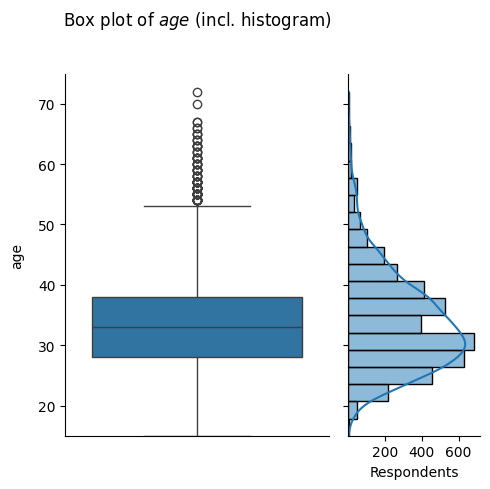

In [31]:
f, (ax_box, ax_hist) = plt.subplots(
    1, 2, sharey=True, gridspec_kw={"width_ratios": (0.50, 0.25)}, figsize=(5, 5)
)

sns.boxplot(df["age"], ax=ax_box)
sns.histplot(data=df, y="age", ax=ax_hist, bins=20, kde=True)

ax_box.set(xticks=[], xlabel="")
ax_box.set_ylabel("age", labelpad=10)
ax_box.set_title(r"Box plot of $\it{age}$ (incl. histogram)", pad=35)
plt.ylim(15, 75)
ax_hist.set(xticks=[200, 400, 600], xlabel="Respondents")
sns.despine(ax=ax_box)
sns.despine(ax=ax_hist, right=True, top=True)
plt.tight_layout()
plt.show()

We can see from the histogram above that the values for age are rather normally distributed. The box plot reveals multiple outliers outside the inner fence, which are marked in the figure with a circle. As we have cleaned already error-related outliers, even the outliers are in a reasonable range and do not have to be further flagged. However, for further analyses it might be interesting to look at this outlier group of respondents 53 years or older in particular.

## 4. <a id='toc4_'></a>[Exploratory data analysis (EDA)](#toc0_)

### 4.1. <a id='toc4_1_'></a>[Respondent overview](#toc0_)

In this subchapter we want to look at the respondent structure across all demographic questions.

### 4.2. <a id='toc4_2_'></a>[Sample size](#toc0_)

The final sample size of the final dataset consist of the following number of interviews, which equals the number of respondents:

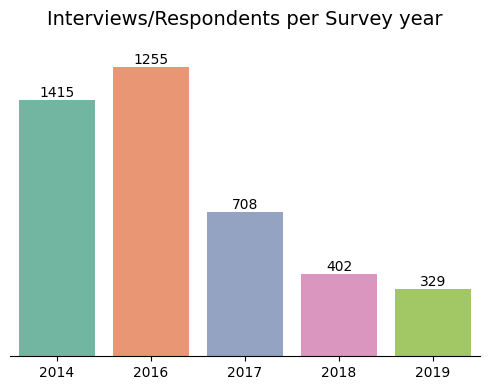

In [32]:
survey_sample_size = df["SurveyID"].value_counts()

plt.figure(figsize=(5, 4))
bar_plot = sns.barplot(
    x=survey_sample_size.index, y=survey_sample_size.values, palette="Set2"
)
plt.title("Interviews/Respondents per Survey year", fontsize=14, pad=20)
plt.ylabel("")
plt.yticks([])
plt.xlabel("")

for bar, value in zip(bar_plot.patches, survey_sample_size.values):
    bar_plot.annotate(
        f"{value}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center",
        va="bottom",
        fontsize=10,
    )

for spine in bar_plot.spines.values():
    spine.set_visible(False)
bar_plot.spines["bottom"].set_visible(True)

plt.tight_layout()
plt.show()

Interviews are not uniformly distributed across the five survey years. This means that any estimates based on the total number of interviews are strongly biased. The survey years 2016 and 2014 are overrepresented in the total, while the other three years are underrepresented.

### 4.3. <a id='toc4_3_'></a>[Age](#toc0_)

In [33]:
df["age"].describe()

count       4104.0
mean     33.844055
std       8.015525
min           15.0
25%           28.0
50%           33.0
75%           38.0
max           72.0
Name: age, dtype: Float64

The distribution of respondents age (after data cleaning) is roughly bell shaped while both, the median and the mean are centered around 33 years, a range from 15 to 72 years but with a cluster between 25 and 40 years. Outliers are respondents with 53 years and older. (as already discussed in chapter 3.3.3.2.1). The center also matches the mode of the uni-modal distribution, as seen below:

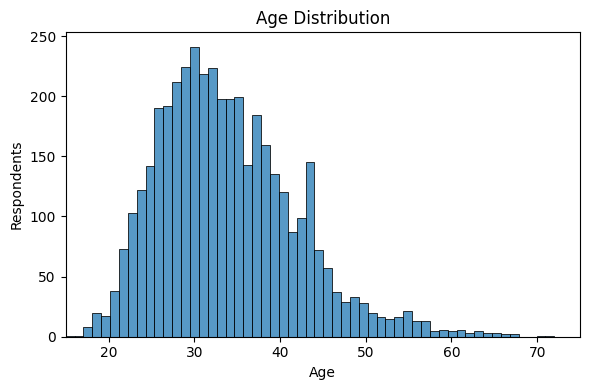

In [34]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x="age", bins=55, kde=False)

plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Respondents")
plt.xlim(15, 75)
plt.tight_layout()
plt.show()

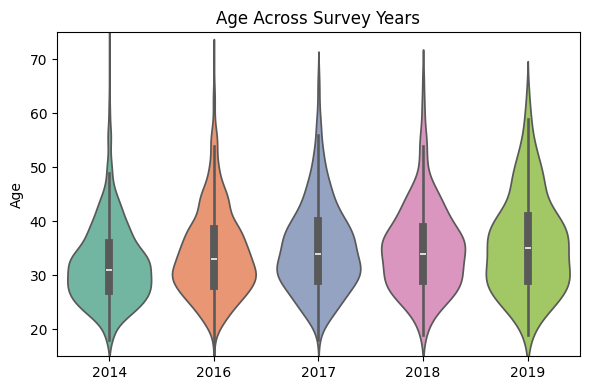

In [35]:
plt.figure(figsize=(6, 4))
sns.violinplot(x="SurveyID", y="age", data=df, palette="Set2")

plt.title("Age Across Survey Years")
plt.xlabel("")
plt.ylabel("Age")
plt.ylim(15, 75)
plt.tight_layout()
plt.show()

Comparing roughly the median bars (white in the black box-plot) of the violin plots, the average age increases throughout the survey years.

The violin plots for the age distribution in every survey year show otherwise very consistent shapes. This means that there are no particular biases for age in a particular survey year. However, noting the sample and survey design discussion, we do not know much about the target population and its age distribution, therefore we cannot rule out any response bias. Studies suggest that the average age of Tech industry employees lies around [35](https://www.cwjobs.co.uk/advice/ageism-in-tech) and [38 years](https://www.diversityintech.co.uk/the-truth-about-ageism-in-tech/#:~:text=The%20report%20also%20stated%20that,age%20discrimination%20in%20their%20organisations.) and therefore somewhat higher than the estimates discovered here. Moreover, the volunteer recruiting via the web-platform access to the surveys could further bias the responses, e.g. by excluding particular groups of the population who are not aware of the survey or those who have generally less desire to participate.

### 4.4. <a id='toc4_4_'></a>[Gender](#toc0_)

The stacked bar chart below shows the distribution of the (recoded) answers to the question about respondent's gender for each survey year.

Since the number of interviews differ widely across the survey waves, the bars are normalized, showing the percentage for each answer per year:

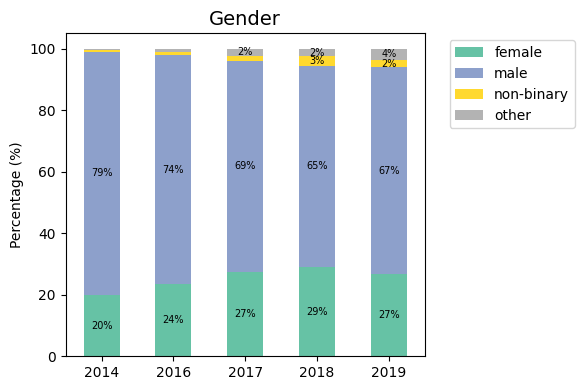

In [36]:
crosstab = pd.crosstab(df["SurveyID"], df["gender_recode"])
crosstab_percentage = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

ax = crosstab_percentage.plot(kind="bar", stacked=True, figsize=(6, 4), colormap="Set2")

from custom_modules.plot_formatting import percentage_stacked_bars
percentage_stacked_bars(ax, threshold=2)

plt.title("Gender", fontsize=14)
plt.xlabel("")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

The share of female respondents shows a positive trend throughout the survey years with 20% to 30% of the sample population. The male respondents still dominate the population but loosing their share from 85% to 65%.

The disparities across gender in the sample population might reflect existing disparities in the target population, where the tech/IT-field as part of the [STEM](https://en.wikipedia.org/wiki/Science,_technology,_engineering,_and_mathematics) disciplines is dominated by males traditionally. Multiple studies suggest such a gender gap in the tech industry, locating about 25% of the target population to females (see e.g. [here](https://technologymagazine.com/articles/kearney-report-highlights-how-to-tackle-the-tech-gender-gap)).

**Age distribution by Gender**

The table below shows the statistical summary of the *Age distribution* for the four Gender subgroups:

In [37]:
df.groupby("gender_recode")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
gender_recode,,,,,,,,
female,983.0,33.44354,8.632849,18.0,27.0,32.0,38.0,72.0
male,3011.0,34.038193,7.836506,15.0,28.0,33.0,39.0,70.0
non-binary,54.0,31.518519,5.894483,21.0,27.0,31.5,35.0,48.0
other,56.0,32.678571,7.507831,23.0,27.75,31.0,37.0,54.0


Interestingly there is not much difference across the genders regarding their average age (measured via mean or median/50%), ranging between 32 and 34 years. Looking at the ranges (min and max) also indicates that there are indeed elder women working in the tech field. Non-binary people and Other, however, are less frequent in the highest age groups (lower max values). The standard deviation from the mean lies around 6 to 8 years.

### 4.5. <a id='toc4_5_'></a>[Country of residence](#toc0_)

In [38]:
len(df["country"].unique())

80

The respondents come from 80 different countries with the following distribution of the top countries:

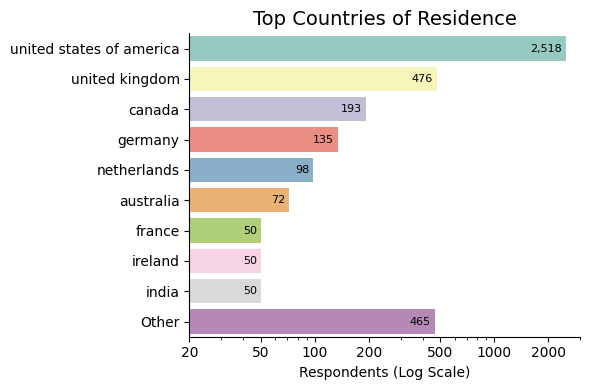

In [77]:
country_counts = df["country"].value_counts()
top_9_countries = country_counts.head(9)
top_9_countries["Other"] = country_counts[9:].sum()


plt.figure(figsize=(6, 4))
bar_plot = sns.barplot(x=top_9_countries.values, y=top_9_countries.index, palette="Set3")

for index, value in enumerate(top_9_countries.values):
    bar_plot.text(value * 0.95, index, f'{value:,}', color='black', ha="right", va="center", fontsize=8)
plt.xscale("log")
custom_ticks = [20, 50, 100, 200, 500, 1000, 2000]
plt.xticks(custom_ticks, labels=[str(tick) for tick in custom_ticks])
plt.title("Top Countries of Residence", fontsize=14)
plt.ylabel("")
plt.xlabel("Respondents (Log Scale)")
plt.xlim(0, 3000)
bar_plot.spines["right"].set_visible(False)
bar_plot.spines["top"].set_visible(False)
plt.tight_layout()
plt.show()

As we can see from the horizontal bar chart above, the interviews are highly biased by the country of residence. More than 2500 respondents, which is more than half of the total sample size, are from the USA. The UK with around 500 respondents and Canada with around 200 respondents come next in the list, while all other countries have only rather marginal number of participants.

As a consequence, the results of this analysis are limited to the geographical region of North America, in particular the USA, and partially UK. This geographical clustering of the survey data also forbids valuable cross-country comparisons.

### 4.6. <a id='toc4_6_'></a>[Self-employment](#toc0_)

In [40]:
pd.DataFrame(
    {
        "Count": df["self_employment"].value_counts(),
        "Percentage (%)": round(
            df["self_employment"].value_counts(normalize=True) * 100
        ),
    }
)

,Count,Percentage (%)
self_employment,,
no,3443,84.0
yes,648,16.0


16% of the respondents are self employed.

## 5. <a id='toc5_'></a>[Feature analysis on Mental Health Disorders](#toc0_)

In this chapter we want to look at the state of the mental health of the respondents. All key features for this are analysed here regarding their development over the survey years (time analysis) and (if relevant) their correlation with the demographic variables age and gender.

### 5.1. <a id='toc5_1_'></a>[Family history of mental illness](#toc0_)

The stacked bar chart below shows the distribution of the answers to the question "Do you have a family history of mental illness?" for each survey year.

Since the number of interviews differ widely across the survey waves, the bars are normalized, showing the percentage for each answer per year:

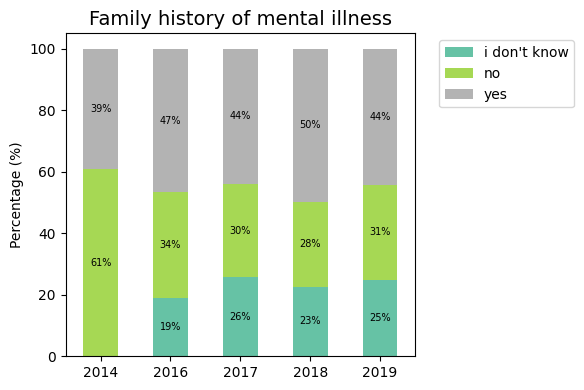

In [41]:
crosstab = pd.crosstab(df["SurveyID"], df["family_illness"])
crosstab_percentage = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

ax = crosstab_percentage.plot(kind="bar", stacked=True, figsize=(6, 4), colormap="Set2")

percentage_stacked_bars(ax)
plt.title("Family history of mental illness", fontsize=14)
plt.xlabel("")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

The share of respondents having a family history of mental illness is rather stable across the surveys and varies between 40% and 50%.

The answer composition also shows that most probably there was no 'Don´t know' answer available in the questionnaire of 2014.

### 5.2. <a id='toc5_2_'></a>[Professional treatment for a mental health disorder](#toc0_)

The stacked bar chart below shows the distribution of the answers to the question "Have you ever sought treatment for a mental health disorder from a mental health professional?" for each survey year.

Since the number of interviews differ widely across the survey waves, the bars are normalized, showing the percentage for each answer per year:

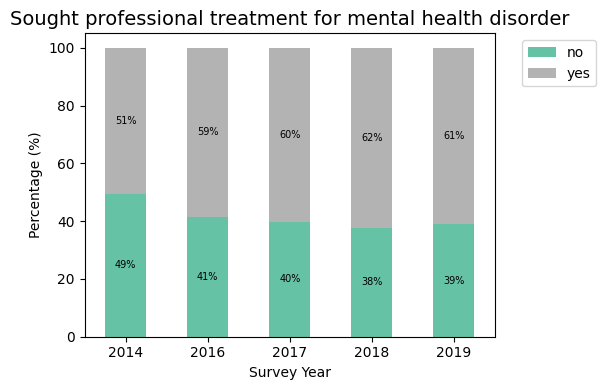

In [42]:
crosstab = pd.crosstab(df["SurveyID"], df["treatment"])
crosstab_percentage = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

ax = crosstab_percentage.plot(kind="bar", stacked=True, figsize=(6, 4), colormap="Set2")
percentage_stacked_bars(ax)

plt.title("Sought professional treatment for mental health disorder", fontsize=14)
plt.xlabel("Survey Year")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

The share of respondents having sought treatment for a mental health disorder from a mental health professional is rather stable across the surveys and varies between 50% and 60%. However, there is a slight tendency visible that the number increased over the years.

#### 5.2.1. <a id='toc5_2_1_'></a>[Professional treatment sought and Gender](#toc0_)

We want to shed light on those who seek professional treatment for mental health disorder. Therefore we compare its share across the different gender groups:

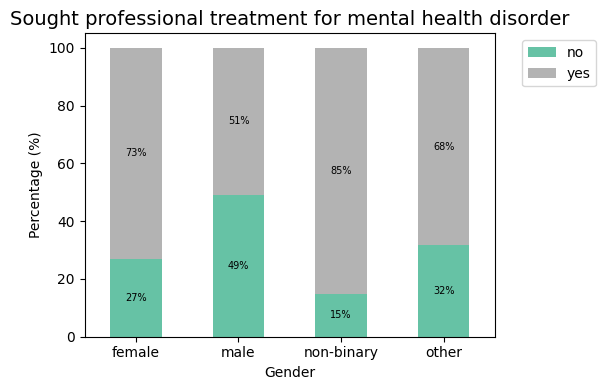

In [43]:
crosstab = pd.crosstab(df["gender_recode"], df["treatment"])
crosstab_percentage = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

ax = crosstab_percentage.plot(kind="bar", stacked=True, figsize=(6, 4), colormap="Set2")
percentage_stacked_bars(ax)

plt.title("Sought professional treatment for mental health disorder", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

From the normalized stacked bar charts above we can see differences across genders. Further below these differences are expressed in numerics by respondent numbers and further below in percentage for each gender subgroup:

In [44]:
crosstab = pd.crosstab(
    df["gender_recode"], df["treatment"], margins=True, margins_name="Total"
)
crosstab

treatment,no,yes,Total
gender_recode,,,
female,264,719,983
male,1476,1536,3012
non-binary,8,46,54
other,19,41,60
Total,1767,2342,4109


In [45]:
from custom_modules.contingency_table import percentage
percentage(df, "gender_recode", "treatment")

treatment,no,yes
gender_recode,,
female,26.9%,73.1%
male,49.0%,51.0%
non-binary,14.8%,85.2%
other,31.7%,68.3%
Total,43.0%,57.0%


We can see for example that *females* and *non-binary people* sought much more often professional treatment than males.

Consequently we want to test the correlation between these two categorical variables in a chi-square test for independence (also known as Pearson's chi-square test or the chi-square test of association), in order to evaluate if there is a significance in association between both:

In [46]:
crosstab = pd.crosstab(df["gender_recode"], df["treatment"])

chi2, p, dof, expected = chi2_contingency(crosstab)
print(f"Χ² ({dof}, N = {crosstab.sum().sum()}) = {chi2:.2f}, p = {p:.3f}")

Χ² (3, N = 4109) = 169.46, p = 0.000


The test statistics above show that there is a significant relationship between *gender* and if the respondent *sought for professional treatment of a mental health disorder*. With p-value < 0.05 (significance level of 5%) we can reject the null hypothesis that "there is no effect of gender in seeking for professional treatment" and the opposite is the case.

#### 5.2.2. <a id='toc5_2_2_'></a>[Professional treatment sought and Age](#toc0_)

Table below shows that there are no big differences regarding the *Age distribution* between those, who sought professional treatment and those who did not: Measures of centricity (mean and median), spread (standard deviation) and the range (min and max) do not differ much:

In [47]:
df.groupby("treatment")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
treatment,,,,,,,,
no,1767.0,33.177702,7.711539,15.0,27.5,32.0,38.0,65.0
yes,2337.0,34.347882,8.203694,18.0,28.0,33.0,39.0,72.0


However, despite the small differences are hard to interpret, due to the large number of datapoints (counts) even the marginal difference in mean is significant, as we can see from the independent t-test statistic below: 

In [48]:
group_yes = df[df["treatment"] == "yes"]["age"].dropna()
group_no = df[df["treatment"] == "no"]["age"].dropna()

t_stat, p_value = ttest_ind(group_yes, group_no, equal_var=False)

print(f"T-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")

T-statistic: 4.682, p-value: 0.000


### 5.3. <a id='toc5_3_'></a>[Mental health disorder in the past](#toc0_)

The stacked bar chart below shows the distribution of the answers to the question "Have you had a mental health disorder in the past?" for each survey year, except of 2014, when it was not asked.

Since the number of interviews differ widely across the survey waves, the bars are normalized, showing the percentage for each answer per year:

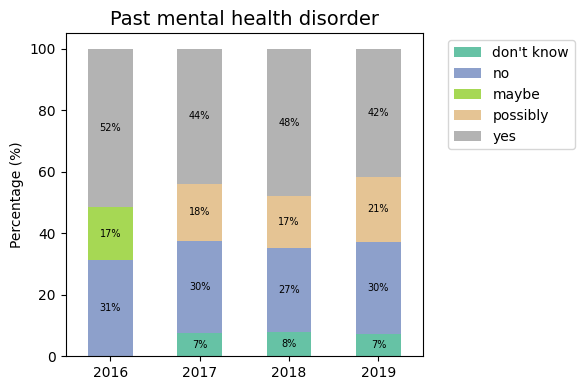

In [49]:
crosstab = pd.crosstab(df["SurveyID"], df["past_disorder"])
crosstab_percentage = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

ax = crosstab_percentage.plot(kind="bar", stacked=True, figsize=(6, 4), colormap="Set2")
percentage_stacked_bars(ax)

plt.title("Past mental health disorder", fontsize=14)
plt.xlabel("")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

The share of respondents having mental health disorders in the past is rather stable across the surveys and varies between 40% and 50%. However, there is a slight tendency visible that the number decreased over the years.

We also note from above chart that in 2016 there was no 'possibly' answer but only a 'maybe' and most likely also no 'Don`t know' answer choice.

### 5.4. <a id='toc5_4_'></a>[Current mental health disorder](#toc0_)

The stacked bar chart below shows the distribution of the answers to the question "Do you currently have a mental health disorder?" for each survey year, except of 2014, when it was not asked.

Since the number of interviews differ widely across the survey waves, the bars are normalized, showing the percentage for each answer per year:

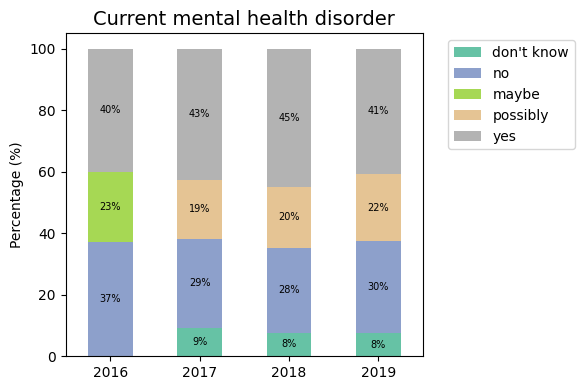

In [50]:
crosstab = pd.crosstab(df["SurveyID"], df["current_disorder"])
crosstab_percentage = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

ax = crosstab_percentage.plot(kind="bar", stacked=True, figsize=(6, 4), colormap="Set2")
percentage_stacked_bars(ax)

plt.title("Current mental health disorder", fontsize=14)
plt.xlabel("")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

The share of respondents having mental health currently is rather stable across the surveys and varies between 40% and 45%. 

We also note from above chart that in 2016 there was no 'possibly' answer but only a 'maybe' and most likely also no 'Don`t know' answer choice.

#### 5.4.1. <a id='toc5_4_1_'></a>[Current mental health disorder and Gender](#toc0_)

We want to shed light on those who state having currently a mental health disorder. Therefore we compare its share across the different gender groups:

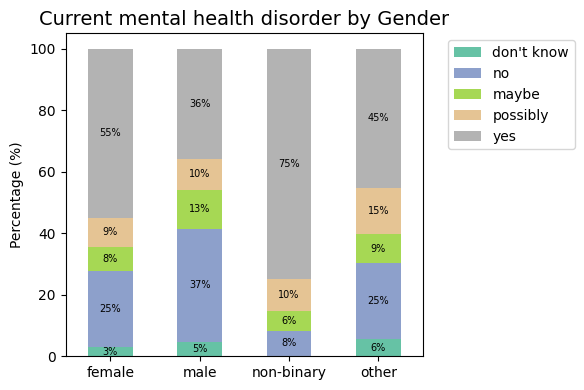

In [51]:
crosstab = pd.crosstab(df["gender_recode"], df["current_disorder"])
crosstab_percentage = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

ax = crosstab_percentage.plot(kind="bar", stacked=True, figsize=(6, 4), colormap="Set2")
percentage_stacked_bars(ax)

plt.title("Current mental health disorder by Gender", fontsize=14)
plt.xlabel("")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

From the normalized stacked bar charts above we can see differences across genders. Further below these differences are expressed in percentage for each gender subgroup:

In [52]:
from custom_modules.contingency_table import percentage
percentage(df, "gender_recode", "current_disorder")

current_disorder,don't know,no,maybe,possibly,yes
gender_recode,,,,,
female,3.0%,24.7%,7.9%,9.4%,54.9%
male,4.8%,36.7%,12.7%,10.1%,35.8%
non-binary,0.0%,8.3%,6.2%,10.4%,75.0%
other,5.7%,24.5%,9.4%,15.1%,45.3%
Total,4.2%,32.9%,11.3%,10.0%,41.5%


We can see that the share of *females* and *non-binary people* stating to have mental health disorders is much larger than among males. Only 8% of *non-binary people* state that they do not have mental health disorders while answering the survey.

Consequently we want to test the correlation between these two categorical variables in a chi-square test for independence (also known as Pearson's chi-square test or the chi-square test of association), in order to evaluate if there is a significance in association between both:

In [53]:
crosstab = pd.crosstab(df["gender_recode"], df["current_disorder"])

chi2, p, dof, expected = chi2_contingency(crosstab)
print(f"Χ² ({dof}, N = {crosstab.sum().sum()}) = {chi2:.2f}, p = {p:.3f}")

Χ² (12, N = 2854) = 114.36, p = 0.000


The test statistics above show that there is a significant relationship between *gender* and if the respondent is *having currently a mental health disorder*. With p-value < 0.05 (significance level of 5%) we can reject the null hypothesis that "there is no effect of gender and having currently a mental health disorder" and the opposite is the case.


### 5.5. <a id='toc5_5_'></a>[Diagnosed mental health disorder](#toc0_)

Looking closer at the answers to the question "Have you ever been diagnosed with a mental health disorder?" for each survey year (except of 2014, when it was not asked) reveals another problem in the dataset: Due to the missing documentation we must be careful and check where filters might be inconsistently applied across the survey waves.

This is here the case as we can see from the two contingency tables below:

In [54]:
pd.crosstab(df["current_disorder"], df["SurveyID"], margins=True)

SurveyID,2016,2017,2018,2019,All
current_disorder,,,,,
don't know,0,65,31,25,121
no,524,206,111,98,939
maybe,323,0,0,0,323
possibly,0,135,79,72,286
yes,568,302,181,134,1185
All,1415,708,402,329,2854


In [55]:
pd.crosstab(df["diagnosed_disorder"], df["SurveyID"], margins=True)

SurveyID,2016,2017,2018,2019,All
diagnosed_disorder,,,,,
no,707,9,2,2,720
yes,708,293,179,132,1312
All,1415,302,181,134,2032


We can see that in 2016 all respondents where asked the question about diagnosed disorders. However, in the subsequent survey years only the respondents were asked this question who answered in the previous question "yes" regarding having a disorder currently. Therefore we must clean this data for 2016 by applying a consistent filter:

In [56]:
df["diagnosed_disorder"] = np.where(
    (df["current_disorder"] != "yes") & (df["SurveyID"] == "2016"),
    None,
    df["diagnosed_disorder"],
)

In [57]:
pd.crosstab(df["diagnosed_disorder"], df["SurveyID"], margins=True)

SurveyID,2016,2017,2018,2019,All
diagnosed_disorder,,,,,
no,63,9,2,2,76
yes,505,293,179,132,1109
All,568,302,181,134,1185


The stacked bar chart below shows the distribution of the corrected answers. Since the number of interviews differ widely across the survey waves, the bars are normalized, showing the percentage for each answer per year:

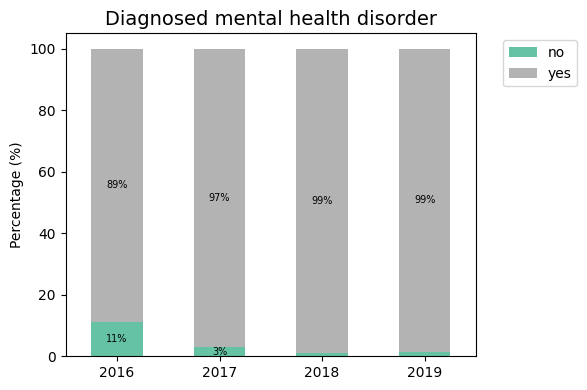

In [58]:
crosstab = pd.crosstab(df["SurveyID"], df["diagnosed_disorder"])
crosstab_percentage = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

ax = crosstab_percentage.plot(kind="bar", stacked=True, figsize=(6, 4), colormap="Set2")
percentage_stacked_bars(ax, threshold=2)

plt.title("Diagnosed mental health disorder", fontsize=14)
plt.xlabel("")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

The vast majority of those currently facing a mental health disorder have also been diagnosed with one. There is also a trend visible in the chart above, since the share has increased from 90% to nearly 100%. 

We want to test if this change is significant, since the number of interviews also decreased throughout the survey years. We are using the *Cochran-Armitage Trend Test* for this purpose. This test is specifically designed to detect a trend in proportions across ordered categories (like years). It can be used to test whether there is a linear trend in the probability of diagnosed treatment across different survey years.

In [59]:
crosstab = pd.crosstab(df["SurveyID"], df["diagnosed_disorder"])

yes_counts = crosstab["yes"].values
no_counts = crosstab["no"].values

n = yes_counts + no_counts

# Assign weights (ordinal numbers) to each year
weights = np.arange(len(yes_counts))

# Cochran-Armitage Trend Test Calculation
p_hat = yes_counts / n  # Proportion of 'yes' per year
p_bar = np.sum(yes_counts) / np.sum(n)  # Overall proportion

# Numerator: weighted sum of differences from the overall proportion
numerator = np.sum(weights * (p_hat - p_bar) * n)

# Denominator: standard deviation of the trend statistic
denominator = np.sqrt(
    np.sum(n * p_bar * (1 - p_bar) * (weights - np.mean(weights)) ** 2)
)

z_score = numerator / denominator

# p-value from Z-score (two-tailed test)
p_value = 2 * norm.sf(abs(z_score))

print(f"Cochran-Armitage Trend Test: Z = {z_score:.2f}, p-value = {p_value:.3f}")

Cochran-Armitage Trend Test: Z = 4.89, p-value = 0.000


The Cochran-Armitage Trend Test was conducted to assess whether there is a significant linear trend between survey year and the proportion of respondents diagnosed with a disorder. The test revealed a statistically significant positive trend, Z = 4.88, p < 0.001, indicating that the likelihood of being diagnosed with a disorder increased consistently across survey years.

### 5.6. <a id='toc5_6_'></a>[Mental health disorder: A first summary](#toc0_)

This latest statement could give an indication about an interesting phenomenon that we could only analyse in further research: Perhaps mental health disorders have been widely more recognized in the public discourse in recent years and consequently the people, who are facing them, are seeking more often professional treatment. This is supported by the previous few time analysis charts, showing that the share of those, who currently have a mental health disorder, is rather stable over time. On the other hand, the share of those seeking professional treatment slightly increased.

Two out of five respondents working in the tech/IT-field were facing a mental health disorder when participating in this survey. This rate is even significantly much higher among females and non-binary people. That is actually very alarming. We look more in detail on particular types of mental health disorders (diseases) in the next chapter when analysing prevalence rates. By doing this, we evaluate if these alarming high numbers of mental health disorders are a particular characteristic of the sample and target population or just describe the state in the overall population.

## 6. <a id='toc6_'></a>[Analysis of the prevalence rate of mental diseases](#toc0_)

### 6.1. <a id='toc6_1_'></a>[Prevalence rate of mental diseases](#toc0_)

The *prevalence* is the proportion of a particular population found to be affected by a medical condition (typically a disease or a risk factor) at a specific time. It is derived by comparing the number of people found to have the condition with the total number of people studied.

Mental diseases are asked about in QuestionID 115: "If yes, what condition(s) have you been diagnosed with?". This question was only asked in the survey wave of 2016, thus the specified time for this particular analysis is the survey period in the year 2016. 

Moreover, the question 115 was only asked to those who answered in question 33 that they have currently a mental health disorder. However, question 33 only asked about the self-assessment of the mental condition of the respondent, without any diagnosis from a professional. The following table shows that n=63 respondents state having currently a mental health disorder without being actually diagnosed:


In [60]:
pd.crosstab(df["diagnosed_disorder"][df["SurveyID"] == "2016"], df["current_disorder"])

current_disorder,yes
diagnosed_disorder,
no,63
yes,505


To correctly assess the prevalence we want to disregard the answers from these n=63 respondents and look only on the diagnosed mental diseases:

In [61]:
df_2016 = df[df["SurveyID"] == "2016"]
df_q115_filtered = df_2016[df_2016["current_disorder"] == "yes"]
df_q115_filtered.shape[0]

568

In [62]:
columns_115 = [
    "115_a1",
    "115_a2",
    "115_a3",
    "115_a4",
    "115_a5",
    "115_a6",
    "115_a7",
    "115_a8",
    "115_a9",
]
pd.concat([df_q115_filtered[col] for col in columns_115]).value_counts().head(10)

mood disorder (depression, bipolar disorder, etc)               409
anxiety disorder (generalized, social, phobia, etc)             340
attention deficit hyperactivity disorder                        120
post-traumatic stress disorder                                   68
obsessive-compulsive disorder                                    45
substance use disorder                                           39
stress response syndromes                                        37
addictive disorder                                               35
personality disorder (borderline, antisocial, paranoid, etc)     35
eating disorder (anorexia, bulimia, etc)                         27
Name: count, dtype: int64

The list above shows the 10 diseases most often mentioned by the respondents. The question was asked open ended, subsequently coded and as a consequence multiple diseases per respondent are possible.

We choose the top 3 diseases *mood disorder (depression, bipolar disorder, etc)*, *anxiety disorder (generalized, social, phobia, etc)* and *attention deficit hyperactivity disorder*, and want to calculate the prevalence rate for them. This procedure needs three steps that are described further:

**Step 1, Format the data:** 

We aggregate the data to get the counts (or proportions) for each disease group:


In [63]:
df_2016["15_mood_disorder"] = df_2016.apply(
    lambda row: (
        "yes"
        if row["current_disorder"] == "yes"
        and "mood disorder (depression, bipolar disorder, etc)"
        in row[columns_115].dropna().values
        else "no"
    ),
    axis=1,
)

df_2016["15_anxiety_disorder"] = df_2016.apply(
    lambda row: (
        "yes"
        if row["current_disorder"] == "yes"
        and "anxiety disorder (generalized, social, phobia, etc)"
        in row[columns_115].dropna().values
        else "no"
    ),
    axis=1,
)

df_2016["15_adhd"] = df_2016.apply(
    lambda row: (
        "yes"
        if row["current_disorder"] == "yes"
        and "attention deficit hyperactivity disorder"
        in row[columns_115].dropna().values
        else "no"
    ),
    axis=1,
)

In [64]:
counts = df_2016[["15_mood_disorder", "15_anxiety_disorder", "15_adhd"]].apply(
    lambda col: col.value_counts(normalize=True).get("yes", 0)
)
counts_df = pd.DataFrame(counts, columns=["proportion"]).reset_index()
counts_df.rename(columns={"index": "group"}, inplace=True)

**Step 2, Calculate the confidence intervals:**
We can calculate confidence intervals using the statistical method of the binomial confidence interval, because we analyse *proportions* (working with means would require the standard error approach).

Using the binomial distribution we compute the standard error and then calculate the upper and lower bounds for a 95% confidence interval (CI). The standard error (SE) quantifies how much the sample proportion is expected to vary from the true population proportion. A 95% confidence interval gives you a range of values within which you can be 95% confident that the true population proportion lies. For a 95% confidence level, the Z-score (from the standard normal distribution) is approximately 1.96. This means that the upper bound is calculated as the proportion plus 1.96 times the standard error, while the lower bound is calculated as the proportion minus 1.96 times the standard error:

In [65]:
n = len(df_2016)

counts_df["se"] = np.sqrt((counts_df["proportion"] * (1 - counts_df["proportion"])) / n)
counts_df["ci_upper"] = counts_df["proportion"] + 1.96 * counts_df["se"]
counts_df["ci_lower"] = counts_df["proportion"] - 1.96 * counts_df["se"]
counts_df

,group,proportion,se,ci_upper,ci_lower
0,15_mood_disorder,0.289046,0.012051,0.312666,0.265426
1,15_anxiety_disorder,0.240283,0.011358,0.262545,0.218021
2,15_adhd,0.084806,0.007406,0.099322,0.070290


**Step 3, Plot a bar chart:**

We display all three disease prevalences as bars with their proportions described in percentages (bold). The plot also displays the Confidence interval (italic) and error bar for each disease prevalence:

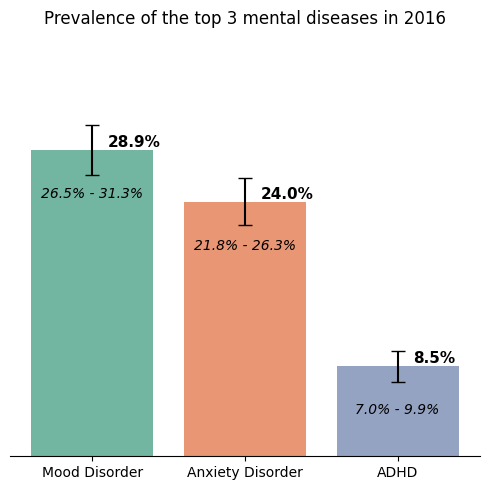

In [66]:
new_labels = ["Mood Disorder", "Anxiety Disorder", "ADHD"]

plt.figure(figsize=(5, 5))
bar_plot = sns.barplot(
    x="group", y="proportion", data=counts_df, capsize=0.2, palette="Set2"
)

from custom_modules.plot_formatting import ci_bar, estimates_bar
ci_bar(counts_df)
estimates_bar(counts_df, bar_plot)

plt.yticks([])
plt.title("Prevalence of the top 3 mental diseases in 2016")
plt.ylim(0, 0.4)
plt.xlabel("")
plt.ylabel("")
bar_plot.set_xticklabels(new_labels, rotation=0)

for spine in bar_plot.spines.values():
    spine.set_visible(False)
bar_plot.spines["bottom"].set_visible(True)

plt.tight_layout()
plt.show()

We can interpret the prevalence of the three diseases as following: 

**Mood Disorder**

The *Mood Disorder* is the most prevalent mental health disease diagnosed among the survey population. More than every fourth person was diagnosed with this disease. The 95% Confidence interval gives us enough certainty to assume that the proportion of this disease in the survey population lies between 27% and 31%, centered at 28.9%. Though
these numbers seem alarming high they are just slightly higher than i.e. U.S.national population figures, where "[an estimated 21.4% of adults will experience a mood disorder at some point in their life](https://www.therecoveryvillage.com/mental-health/mood-disorders/mood-disorders-statistics/)".

**Anxiety Disorder**

The *Anxiety Disorder* is the second most prevalent health disease diagnosed. The 95% Confidence interval gives us enough certainty to assume that the proportion of this disease in the survey population lies between 22% and 26%, centered at 24%. These figures also follow national U.S. estimates, which range in other studies between [19.1%](https://www.nami.org/about-mental-illness/mental-health-conditions/anxiety-disorders/) and [34%](https://www.sciencedirect.com/topics/psychology/prevalence-of-anxiety).

**Attention Deficit Hyperactivity Disorder**

Less than one out of ten people in the population were diagnosed with *Attention Deficit Hyperactivity Disorder*. The 95% Confidence interval gives us enough certainty to assume that the proportion of this disease in the survey population lies between 7% and 10%, centered at 8.5%. ADHD prevalence rates are higher among children but not the disease is not unusual among adults, particularly in the U.S. Studies vary in their estimates between [2% and 5%](https://www.sciencedirect.com/science/article/pii/S0165178123003992).

### 6.2. <a id='toc6_2_'></a>[Gender differences in the prevalence rates of mental diseases](#toc0_)

#### 6.2.1. <a id='toc6_2_1_'></a>[Mood disorder](#toc0_)

We have a quick look at the observations of diagnosed *Mood disorder* in each gender group:

In [67]:
pd.crosstab(
    df_2016["gender_recode"],
    df_2016["15_mood_disorder"],
    margins=True,
)

15_mood_disorder,no,yes,All
gender_recode,,,
female,186,147,333
male,807,244,1051
non-binary,6,11,17
other,7,7,14
All,1006,409,1415


Calculating and plotting the prevalence rates of Mood disorder in the survey population across the Gender groups reveals significant differences:

In [68]:
counts = (
    df_2016.groupby("gender_recode")["15_mood_disorder"]
    .value_counts(normalize=True)
    .unstack(fill_value=0)["yes"]
)

counts_df = counts.reset_index()
counts_df.columns = ["gender_recode", "proportion"]

n = df_2016.groupby("gender_recode")["15_mood_disorder"].count()

counts_df["se"] = np.sqrt(
    (counts_df["proportion"]) * (1 - counts_df["proportion"]) / n.values
)
counts_df["ci_upper"] = counts_df["proportion"] + 1.96 * counts_df["se"]
counts_df["ci_lower"] = counts_df["proportion"] - 1.96 * counts_df["se"]

counts_df

,gender_recode,proportion,se,ci_upper,ci_lower
0,female,0.441441,0.027211,0.494776,0.388107
1,male,0.232160,0.013023,0.257686,0.206634
2,non-binary,0.647059,0.115904,0.874231,0.419887
3,other,0.500000,0.133631,0.761916,0.238084


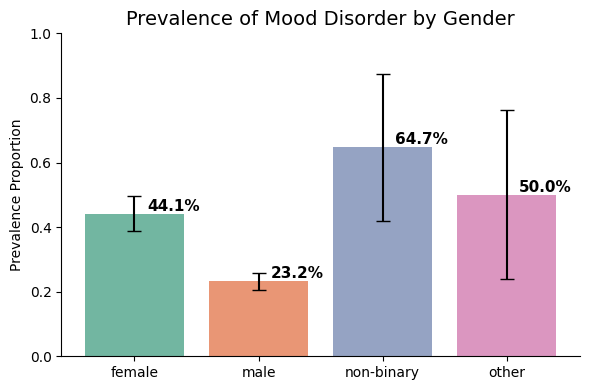

In [69]:
plt.figure(figsize=(6, 4))

bars = sns.barplot(
    x="gender_recode", y="proportion", data=counts_df, capsize=0.2, palette="Set2"
)

ci_bar(counts_df, group="gender_recode")
 
for index, row in counts_df.iterrows():
    bars.text(
        index + 0.1,
        row["proportion"],
        f"{row['proportion']:.1%}",
        color="black",
        ha="left",
        va="bottom",
        fontweight="bold",
        fontsize=11,
    )

plt.title("Prevalence of Mood Disorder by Gender", fontsize=14)
plt.ylabel("Prevalence Proportion")
plt.ylim(0, 1)
plt.xlabel("")

for spine in bars.spines.values():
    spine.set_visible(False)
bars.spines["bottom"].set_visible(True)
bars.spines["left"].set_visible(True)

plt.tight_layout()
plt.show()

The bar chart above shows that males have the lowest prevalence rate for this mental health disorder diagnosed and the small confidence intervall provides high certainty for this finding. The females in contrast have a significantly higher prevalence rate. This follows other studies saying that "[the prevalence of mood disorders in a given year was higher for females than males](https://www.therecoveryvillage.com/mental-health/mood-disorders/mood-disorders-statistics/)" (though with lower values). The highest rate shows the non-binary group with a center of 65% but a large uncertainty due to a wide confidence intervall.

#### 6.2.2. <a id='toc6_2_2_'></a>[Anxiety disorder](#toc0_)

We have a quick look at the observations of diagnosed *Anxiety disorder* in each gender group:

In [70]:
pd.crosstab(
    df_2016["gender_recode"],
    df_2016["15_anxiety_disorder"],
    margins=True,
)

15_anxiety_disorder,no,yes,All
gender_recode,,,
female,218,115,333
male,838,213,1051
non-binary,9,8,17
other,10,4,14
All,1075,340,1415


In [71]:
counts = (
    df_2016.groupby("gender_recode")["15_anxiety_disorder"]
    .value_counts(normalize=True)
    .unstack(fill_value=0)["yes"]
)

counts_df = counts.reset_index()
counts_df.columns = ["gender_recode", "proportion"]

n = df_2016.groupby("gender_recode")["15_anxiety_disorder"].count()

counts_df["se"] = np.sqrt(
    (counts_df["proportion"]) * (1 - counts_df["proportion"]) / n.values
)
counts_df["ci_upper"] = counts_df["proportion"] + 1.96 * counts_df["se"]
counts_df["ci_lower"] = counts_df["proportion"] - 1.96 * counts_df["se"]

counts_df

,gender_recode,proportion,se,ci_upper,ci_lower
0,female,0.345345,0.026056,0.396415,0.294275
1,male,0.202664,0.012400,0.226967,0.178361
2,non-binary,0.470588,0.121058,0.707862,0.233315
3,other,0.285714,0.120736,0.522357,0.049071


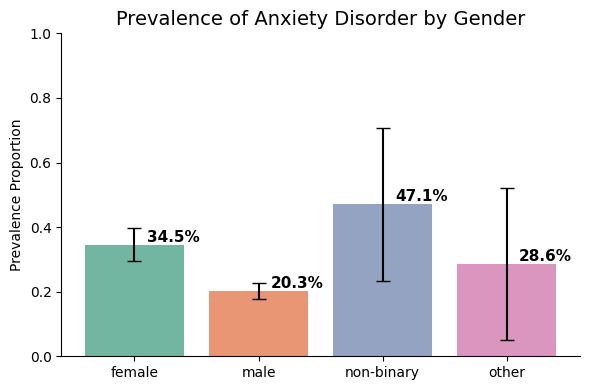

In [72]:
plt.figure(figsize=(6, 4))

bars = sns.barplot(
    x="gender_recode", y="proportion", data=counts_df, capsize=0.2, palette="Set2"
)

ci_bar(counts_df, group="gender_recode")
 
for index, row in counts_df.iterrows():
    bars.text(
        index + 0.1,
        row["proportion"],
        f"{row['proportion']:.1%}",
        color="black",
        ha="left",
        va="bottom",
        fontweight="bold",
        fontsize=11,
    )

plt.title("Prevalence of Anxiety Disorder by Gender", fontsize=14)
plt.ylabel("Prevalence Proportion")
plt.ylim(0, 1)
plt.xlabel("")

for spine in bars.spines.values():
    spine.set_visible(False)
bars.spines["bottom"].set_visible(True)
bars.spines["left"].set_visible(True)

plt.tight_layout()
plt.show()

The prevalence rates of Anxiety Disorder by Gender, as seen in the bar chart above, shows a rather similar picture as for the Mood Disorder: Males have a signifcantly lower rate than females and the highest is among the non-binary people. This follows [other studies' findings](https://adaa.org/find-help-for/women/anxiety#:~:text=An%20estimated%20264%20million%20people,than%20for%20males%20(14.3%25).). However, this occurs on a lower rate level than for Mood Disorder and all prevalance rates are closer to each other.

#### 6.2.3. <a id='toc6_2_3_'></a>[Attention Deficit Hyperactivity Disorder](#toc0_)

We have a quick look at the observations of diagnosed *ADHD* in each gender group:

In [73]:
pd.crosstab(
    df_2016["gender_recode"],
    df_2016["15_adhd"],
    margins=True,
)

15_adhd,no,yes,All
gender_recode,,,
female,294,39,333
male,975,76,1051
non-binary,15,2,17
other,11,3,14
All,1295,120,1415


In [74]:
counts = (
    df_2016.groupby("gender_recode")["15_adhd"]
    .value_counts(normalize=True)
    .unstack(fill_value=0)["yes"]
)

counts_df = counts.reset_index()
counts_df.columns = ["gender_recode", "proportion"]

n = df_2016.groupby("gender_recode")["15_adhd"].count()

counts_df["se"] = np.sqrt(
    (counts_df["proportion"]) * (1 - counts_df["proportion"]) / n.values
)
counts_df["ci_upper"] = counts_df["proportion"] + 1.96 * counts_df["se"]
counts_df["ci_lower"] = counts_df["proportion"] - 1.96 * counts_df["se"]

counts_df

,gender_recode,proportion,se,ci_upper,ci_lower
0,female,0.117117,0.017621,0.151655,0.082579
1,male,0.072312,0.007989,0.087971,0.056653
2,non-binary,0.117647,0.078142,0.270806,-0.035512
3,other,0.214286,0.109664,0.429228,-0.000656


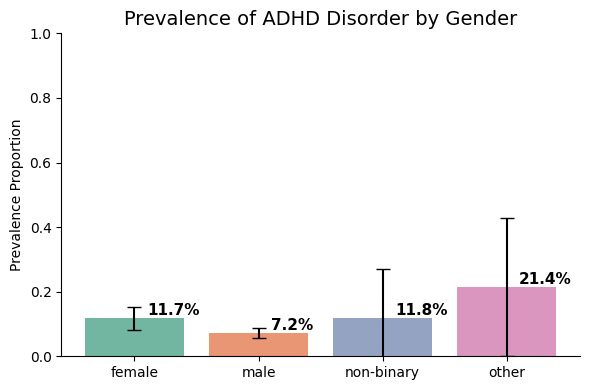

In [75]:
plt.figure(figsize=(6, 4))

bars = sns.barplot(
    x="gender_recode", y="proportion", data=counts_df, capsize=0.2, palette="Set2"
)

ci_bar(counts_df, group="gender_recode")

for index, row in counts_df.iterrows():
    bars.text(
        index + 0.1,
        row["proportion"],
        f"{row['proportion']:.1%}",
        color="black",
        ha="left",
        va="bottom",
        fontweight="bold",
        fontsize=11,
    )

plt.title("Prevalence of ADHD Disorder by Gender", fontsize=14)
plt.ylabel("Prevalence Proportion")
plt.ylim(0, 1)
plt.xlabel("")

for spine in bars.spines.values():
    spine.set_visible(False)
bars.spines["bottom"].set_visible(True)
bars.spines["left"].set_visible(True)

plt.tight_layout()
plt.show()

The prevalence rates of ADHD by Gender, as seen in the bar chart above, differs slightly from the patterns of gender differences seen for the other two major mental health disorders. Males still have a lower rate than females, though, but it is not significant anymore (see the overlap between the errorbars for males and females). The highest prevalence rate is among those did not reveal their gender or mentioning Other. 

[Other studies](https://psychcentral.com/adhd/adhd-and-gender#prevalence) suggest that males have a higher prevalence rate for ADHD but claim that there might be underlying gender bias: "A 2019 study suggests that ADHD diagnosis may be more easily missed among females during the diagnostic process. Females are also less likely to be prescribed medication and receive a diagnosis because they don’t typically display the disruptive external symptoms associated with ADHD."



## 7. <a id='toc7_'></a>[Suggestions for further research](#toc0_)

### 7.1. <a id='toc7_1_'></a>[Awareness of mental health disorders in the public](#toc0_)

The findings described in the summary of the mental healt disorder analysis (4.2.6.) can give an indication about a phenomenon that we could only analyse in future research: Perhaps mental health disorders have been widely more recognized in the public discourse in recent years and consequently the people, who are facing them, are seeking more often professional treatment. This is supported by the few time analysis charts (in 4.2.), showing that the share of those, who currently have a mental health disorder, is rather stable over time. On the other hand, the share of those seeking professional treatment slightly increased. The findings must be evaluated with trends in the overall population.

### 7.2. <a id='toc7_2_'></a>[Mental health disorders by Age and their impact](#toc0_)

The analysis on the prevalence rate of particular mental diseases could be expanded. For example diseases with a significant higher rate for males than females could be identified and further studied. This would have relevance since the data suggests that the majority of people in the target population are still males.

Moreover the slow "aging" of the target population (slightly increasing average age of the target population) could be starting point to ask for differences in the prevalence rate for particular age groups.

Subsequently, we could study the different impacts of particular health disorders, how they interfere with the work (questions 44 and 45 in the dataset) as well as the impact on the work productivity (questions 54 and 55 in the dataset). 

## 8. <a id='toc8_'></a>[Summary](#toc0_)

**Respondent structure** 

The dataset captures insights from a diverse pool of tech industry professionals who have shared their experiences with mental health. The following are the key demographics examined in the analysis:

- ***Survey Years and Sample Sizes***: There is significant variation in sample sizes across survey years, ranging from several hundred to over a thousand respondents. This variability impacts the generalizability of year-to-year comparisons.

- ***Age***: The majority of respondents are in their 20s and 30s, but notable outliers include individuals as old as 53 or elder. The wide age range introduces the potential for generational differences in mental health experiences.

- ***Gender***: The dataset predominantly includes male respondents, with a smaller but important representation of females and non-binary individuals. The gender distribution reveals potential areas for gender-specific analyses, particularly in mental health treatment.

- ***Country of Residence***: Respondents come from a wide range of countries, but the data is heavily skewed toward North America and UK, limiting the global representativeness.

- ***Self-Employment***: A significant portion of respondents are self-employed, which could highlight distinct challenges in accessing mental health support compared to traditionally employed individuals.

The respondent overview provides a foundation for understanding the various demographic factors that contribute to the prevalence of mental health conditions in the tech sector, guiding further analysis.

**Analysis** 

The analysis of diagnosed mental health conditions over time reveals that the distribution of diagnoses varies significantly across the survey years. While some fluctuations in diagnoses may be influenced by external societal factors, a gradual increase in reported mental health conditions is observed. Moreover, a deeper analysis suggests gender differences in mental health diagnoses, with higher rates among women in the dataset. These findings highlight the need for tailored mental health support strategies in the tech industry.

The analysis of the prevalence rates of mental health disorders show that the estimates in this sample population somewhat follow figures in the overall population. The three methal health disorders diagnosed are Mood Disorder, Anxiety Disorder, and ADHD. However, the results also reveal i.e. significant gender differences in those specific conditions. Women reported higher rates of mood and anxiety disorders compared to men, while ADHD showed less gender disparity. These insights highlight how mental health challenges manifest differently across genders, which can be critical for developing gender-sensitive mental health interventions. Understanding these variations is essential for creating tailored support systems in the tech industry.

These findings are once more summaried here briefly:

- ***Diagnosed mental health conditions vary across survey years***: A gradual increase in reported mental health conditions is observed over time.
  
- ***Gender differences in mental health diagnoses***:
  - Women report higher rates of diagnosed mental health conditions compared to men.
  - Mood and anxiety disorders are more prevalent among women.
  - ADHD shows less gender disparity compared to mood and anxiety disorders.

- ***Prevalence rates of mental health disorders***:
  - The sample population follows similar trends to the overall (US national) population in terms of diagnosed mental health disorders.
  - The three most common diagnosed conditions are Mood Disorder, Anxiety Disorder, and ADHD.

This summary underscores the importance of understanding gender differences and trends over time to develop effective support systems for mental health in the tech sector.

**Limitations** 

A balanced evaluation is required in order to be able to properly assess those findings, because we need to recall the multiple limitations already mentioned (2.1.4.). There is the survey design that might attract an audience who is very interested in this research subject or at least those who see particular personal relevance in it. Most likely among them is also a higher share sensible to the topic of mental health disorders and among those consequently more people facing them. This situation is called *Voluntary response bias*, when the sample is made of people who have volunteered to take part in the survey. This can additionally result in a study that overreports on one aspect as it's more likely to have a *highly opinionated sample*. Consequently, this survey design and its data collection procedure via a voluntary sampling involves such risk of being affected by a response bias.

Moreover, with the non-probability sampling design and the absence of further strategies to calibrate the survey distribution, any generalizations for the particular target population cannot be justified. **All findings are only limited to this particular sample population**. Evidence for sampling bias was observed by analyzing the respondent overview (4.1.) during the EDA. Firstly, the dataset is unevenly distributed across the survey years. This leads to a bias when examining the dataset as a whole. Therefore all analyses performed in this project involve procedures to counter this bias (prior cross-check for differences across survey years and separate analysis). On the other hand, no evidence for sampling bias could be found in the age and gender distribution. The geographical location of the respondents, however, reveals a particular strong bias.


 